


https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   



upload this:
mammographic_masses.data.txt 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
DearDataset = pd.read_csv('mammographic_masses(with_Missing).data.txt')
DearDataset.head(40)

,BI_RADS,age,shapee,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,,1
5,4,65,1,,3,0
6,4,70,,,3,0
7,5,42,1,,3,0
8,5,57,1,5,3,1
9,5,60,,5,1,1


Make sure you use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

In [3]:
DearDataset.severity.unique()    # check all the unique values so you can get rid of them if they are outliers or noise(NaN)

array([1, 0], dtype=int64)

In [4]:
DearDataset.drop(DearDataset[DearDataset.BI_RADS == ' '].index, inplace=True)
DearDataset.drop(DearDataset[DearDataset.BI_RADS == 55].index, inplace=True)  # check your data for irrelevant values also!
DearDataset.drop(DearDataset[DearDataset.BI_RADS == 6].index, inplace=True)
DearDataset.drop(DearDataset[DearDataset.margin == ' '].index, inplace=True)
DearDataset.drop(DearDataset[DearDataset.age == ' '].index, inplace=True)
DearDataset.drop(DearDataset[DearDataset.density == ' '].index, inplace=True)
DearDataset.drop(DearDataset[DearDataset.shapee == ' '].index, inplace=True)# I named it shapee because "shape" is a func in python

In [5]:
DearDataset

,BI_RADS,age,shapee,margin,density,severity
0,5,67,3,5,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
8,5,57,1,5,3,1
10,5,76,1,4,3,1
11,3,42,2,1,3,1
13,4,36,3,1,2,0
14,4,60,2,1,2,0
15,4,54,1,1,3,0
16,3,52,3,4,3,0


In [6]:
missing_val_count_by_column = (DearDataset.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])   #none

Series([], dtype: int64)


In [7]:
# its time to separate our TARGET column from dataset!
x_data  = DearDataset.drop('severity',axis=1)
y = DearDataset['severity']
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y,test_size=0.3)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()# why do i need this? Because we want to "scale" our data

In [10]:
scaler.fit(X_train)

MinMaxScaler()

In [11]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)

In [12]:

X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

Next you'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). You'll also need an array of the feature name labels.

In [13]:
X_train

,BI_RADS,age,shapee,margin,density
122,0.666667,0.076923,0.333333,0.00,0.333333
732,0.666667,0.038462,0.333333,0.00,0.666667
14,0.666667,0.538462,0.333333,0.00,0.333333
272,0.833333,0.615385,1.000000,0.75,0.666667
335,0.833333,0.628205,1.000000,1.00,0.666667
464,0.666667,0.448718,0.000000,0.00,0.666667
478,0.666667,0.230769,0.000000,0.00,0.666667
893,0.666667,0.294872,0.000000,0.00,0.666667
138,0.666667,0.448718,0.000000,0.00,0.666667
716,1.000000,0.679487,1.000000,0.75,0.666667


In [14]:
import tensorflow as tf

D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

Some of our models require the input data to be normalized, so go ahead and normalize the attribute data. Hint: use preprocessing.StandardScaler().

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Load libraries


import pandas as pd
import numpy as np # linear algebra


from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
# Set random seed
np.random.seed(0)
from keras.models import Sequential
from keras.layers import Dense
import numpy
from keras.layers import Flatten

Using TensorFlow backend.


## Decision Trees

Before moving to K-Fold cross validation and random forests, start by creating a single train/test split of our data. Set aside 75% for training, and 25% for testing.

In [16]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
tree_pred = decision_tree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,tree_pred))
print(classification_report(y_test,tree_pred))

[[103  33]
 [ 35  78]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       136
           1       0.70      0.69      0.70       113

    accuracy                           0.73       249
   macro avg       0.72      0.72      0.72       249
weighted avg       0.73      0.73      0.73       249



Now create a DecisionTreeClassifier and fit it to your training data.

 RandomForestClassifier instead.

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[107  29]
 [ 24  89]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       136
           1       0.75      0.79      0.77       113

    accuracy                           0.79       249
   macro avg       0.79      0.79      0.79       249
weighted avg       0.79      0.79      0.79       249



## SVM

Next try using svm.SVC with a linear kernel. How does it compare to the decision tree?

In [18]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
y_pred = svclassifier.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[111  25]
 [ 15  98]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       136
           1       0.80      0.87      0.83       113

    accuracy                           0.84       249
   macro avg       0.84      0.84      0.84       249
weighted avg       0.84      0.84      0.84       249



## KNN
How about K-Nearest-Neighbors? Hint: use neighbors.KNeighborsClassifier - it's a lot easier than implementing KNN from scratch like we did earlier in the course. Start with a K of 10. K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set.

In [21]:
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,KN_pred))
print(classification_report(y_test,KN_pred))

[[112  24]
 [ 26  87]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       136
           1       0.78      0.77      0.78       113

    accuracy                           0.80       249
   macro avg       0.80      0.80      0.80       249
weighted avg       0.80      0.80      0.80       249



## Maybe Non-Linear SVM

svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Try the rbf, sigmoid, and poly kernels and see what the best-performing kernel is. Do we have a new winner?

In [22]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)

SVC(kernel='poly')

In [23]:
y2_pred = svclassifier.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y2_pred))
print(classification_report(y_test,y2_pred))

[[121  15]
 [ 25  88]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       136
           1       0.85      0.78      0.81       113

    accuracy                           0.84       249
   macro avg       0.84      0.83      0.84       249
weighted avg       0.84      0.84      0.84       249



## Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [25]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression() 
regr.fit(X_train, y_train) #training the algorithm
Log_pred = regr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,Log_pred))
print(classification_report(y_test,Log_pred))

[[109  27]
 [ 15  98]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       136
           1       0.78      0.87      0.82       113

    accuracy                           0.83       249
   macro avg       0.83      0.83      0.83       249
weighted avg       0.84      0.83      0.83       249



In [26]:
print('Decision Tree:', accuracy_score(y_test, tree_pred)*100,'%')
print('Random Forest:', accuracy_score(y_test, rf_pred)*100,'%')
print('KNeighbors:',accuracy_score(y_test, KN_pred)*100,'%')
print('SVM:',accuracy_score(y_test, y_pred)*100,'%')
print('Non-Linear SVM', accuracy_score(y_test, y2_pred)*100, '%')

Decision Tree: 72.69076305220884 %
Random Forest: 78.714859437751 %
KNeighbors: 79.91967871485943 %
SVM: 83.93574297188755 %
Non-Linear SVM 83.93574297188755 %




As a bonus challenge, let's see if an artificial neural network can do even better. You can use Keras to set up a neural network with 1 binary output neuron and see how it performs. Don't be afraid to run a large number of epochs to train the model if necessary.

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout  # I AM SO SORRY TO USE TF2.0 FML , I NEED TO ADD THOSE OR NOT WORKING
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()

model.add(Dense(7, input_dim=5, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=8, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]

In [30]:
model_without_early=model.fit(X_train, y_train, validation_split=0.35, epochs=200, batch_size=75)


Train on 377 samples, validate on 203 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
377/377 [==============================] - 1s 2ms/sample - loss: 0.6715 - acc: 0.4960 - val_loss: 0.6758 - val_acc: 0.5025
Epoch 2/200
377/377 [==============================] - 0s 37us/sample - loss: 0.6672 - acc: 0.4960 - val_loss: 0.6729 - val_acc: 0.5025
Epoch 3/200
377/377 [==============================] - 0s 56us/sample - loss: 0.6639 - acc: 0.4960 - val_loss: 0.6706 - val_acc: 0.5025
Epoch 4/200
377/377 [==============================] - 0s 61us/sample - loss: 0.6611 - acc: 0.4960 - val_loss: 0.6683 - val_acc: 0.5025
Epoch 5/200
377/377 [==============================] - 0s 74us/sample - loss: 0.6585 - acc: 0.4960 - val_loss: 0.6665 - val_acc: 0.5025
Epoch 6/200
377/377 [==============================] - 0s 42us/sample - loss: 0.6561 - acc: 0.4960 - val_loss: 0.6647 - val_acc: 0.5025
Epoch 7/200
377/377 [==============================] - 0s 48us/sample - loss: 0.6537 - acc:

Epoch 59/200
377/377 [==============================] - 0s 65us/sample - loss: 0.5777 - acc: 0.7745 - val_loss: 0.6081 - val_acc: 0.7438
Epoch 60/200
377/377 [==============================] - 0s 42us/sample - loss: 0.5764 - acc: 0.7692 - val_loss: 0.6078 - val_acc: 0.7438
Epoch 61/200
377/377 [==============================] - 0s 77us/sample - loss: 0.5754 - acc: 0.7692 - val_loss: 0.6072 - val_acc: 0.7438
Epoch 62/200
377/377 [==============================] - 0s 53us/sample - loss: 0.5742 - acc: 0.7692 - val_loss: 0.6067 - val_acc: 0.7438
Epoch 63/200
377/377 [==============================] - 0s 37us/sample - loss: 0.5732 - acc: 0.7692 - val_loss: 0.6060 - val_acc: 0.7438
Epoch 64/200
377/377 [==============================] - 0s 29us/sample - loss: 0.5723 - acc: 0.7692 - val_loss: 0.6060 - val_acc: 0.7438
Epoch 65/200
377/377 [==============================] - 0s 29us/sample - loss: 0.5714 - acc: 0.7692 - val_loss: 0.6056 - val_acc: 0.7438
Epoch 66/200
377/377 [===================

377/377 [==============================] - 0s 42us/sample - loss: 0.5367 - acc: 0.7825 - val_loss: 0.5842 - val_acc: 0.7488
Epoch 119/200
377/377 [==============================] - 0s 66us/sample - loss: 0.5365 - acc: 0.7798 - val_loss: 0.5843 - val_acc: 0.7488
Epoch 120/200
377/377 [==============================] - 0s 53us/sample - loss: 0.5360 - acc: 0.7798 - val_loss: 0.5839 - val_acc: 0.7488
Epoch 121/200
377/377 [==============================] - 0s 40us/sample - loss: 0.5353 - acc: 0.7825 - val_loss: 0.5830 - val_acc: 0.7438
Epoch 122/200
377/377 [==============================] - 0s 29us/sample - loss: 0.5347 - acc: 0.7825 - val_loss: 0.5826 - val_acc: 0.7438
Epoch 123/200
377/377 [==============================] - 0s 34us/sample - loss: 0.5341 - acc: 0.7825 - val_loss: 0.5827 - val_acc: 0.7488
Epoch 124/200
377/377 [==============================] - 0s 61us/sample - loss: 0.5339 - acc: 0.7825 - val_loss: 0.5826 - val_acc: 0.7488
Epoch 125/200
377/377 [=========================

377/377 [==============================] - 0s 34us/sample - loss: 0.5065 - acc: 0.7984 - val_loss: 0.5649 - val_acc: 0.7389
Epoch 178/200
377/377 [==============================] - 0s 48us/sample - loss: 0.5064 - acc: 0.8011 - val_loss: 0.5653 - val_acc: 0.7389
Epoch 179/200
377/377 [==============================] - 0s 34us/sample - loss: 0.5061 - acc: 0.8011 - val_loss: 0.5655 - val_acc: 0.7389
Epoch 180/200
377/377 [==============================] - 0s 71us/sample - loss: 0.5057 - acc: 0.8011 - val_loss: 0.5658 - val_acc: 0.7438
Epoch 181/200
377/377 [==============================] - 0s 69us/sample - loss: 0.5060 - acc: 0.8011 - val_loss: 0.5662 - val_acc: 0.7438
Epoch 182/200
377/377 [==============================] - 0s 58us/sample - loss: 0.5054 - acc: 0.8011 - val_loss: 0.5650 - val_acc: 0.7389
Epoch 183/200
377/377 [==============================] - 0s 45us/sample - loss: 0.5045 - acc: 0.8011 - val_loss: 0.5644 - val_acc: 0.7389
Epoch 184/200
377/377 [=========================

In [31]:
def plot_model_history(model_history): #Plot Accuracy or Loss as a Function of Number of Epoch
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

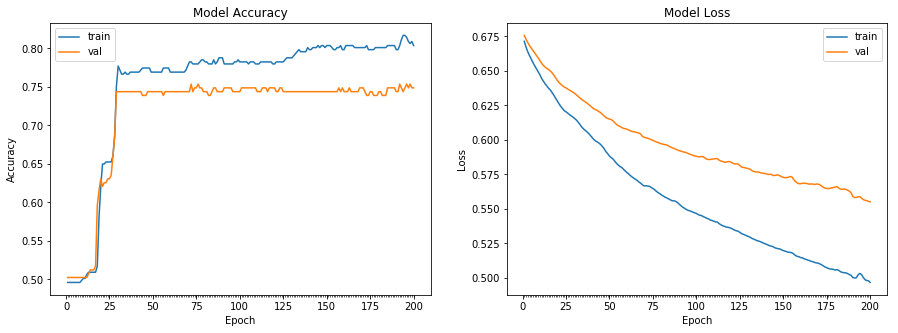

In [32]:
plot_model_history(model_without_early)
